### Récupération du dataset

In [2]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "mirichoi0218/insurance"
path = kh.dataset_download(dataset_ref)

# Localiser le fichier CSV dans le dossier téléchargé
csv_file = f"{path}/insurance.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)

display(df)
df.info()

d:\Sources\DS-Machine-Learning\Regression\my_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 16.0k/16.0k [00:00<00:00, 16.9MB/s]

Extracting files...


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Gestion des doublons et des valeurs manquantes

In [6]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())
df = df.drop_duplicates()

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

1
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Vérification de la validité des données

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


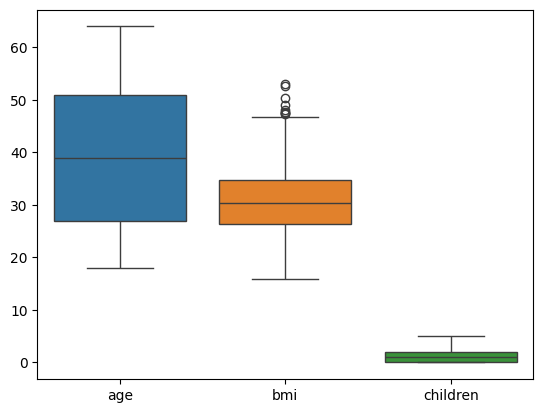

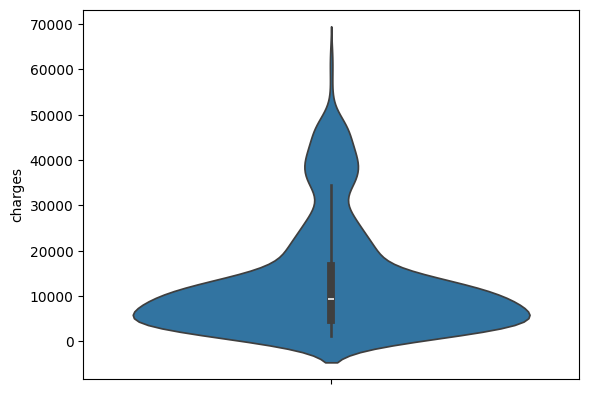

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier la distribution des données qualitatives
print (df['sex'].value_counts())
print (df['smoker'].value_counts())
print (df['region'].value_counts())

# Vérifier la distribution des données quantitatives
sns.boxplot(df.drop(['sex', 'smoker','region','charges'], axis=1))
plt.show()

sns.violinplot(df['charges'])
plt.show()

# Les données semblent cohérentes

### Analyse des relations entre les données

<Axes: title={'center': 'charges'}, xlabel='region'>

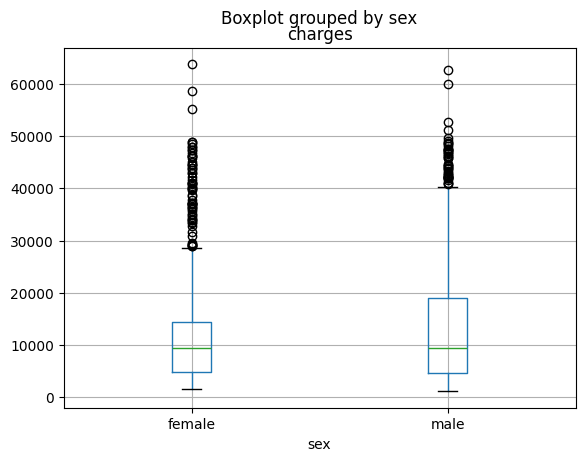

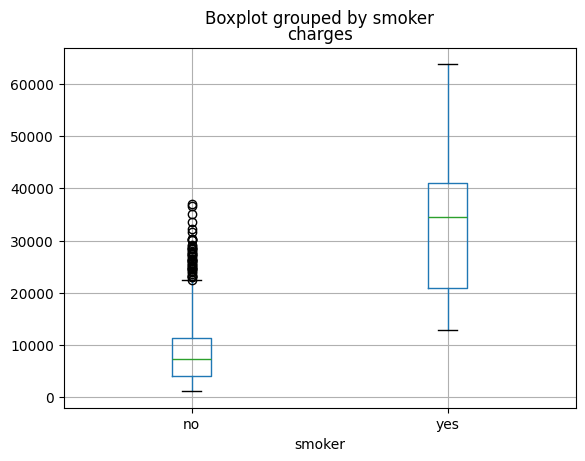

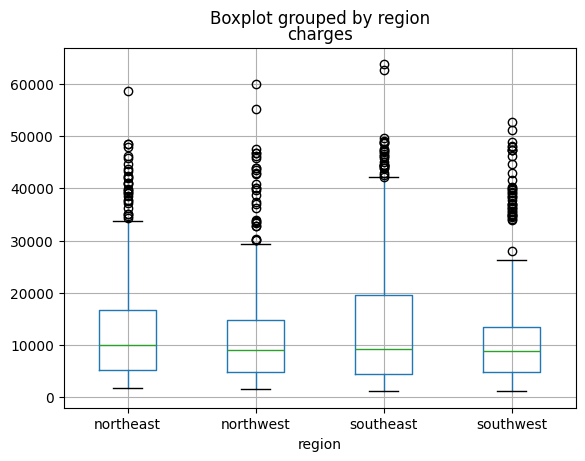

In [ ]:
df.boxplot(column= 'charges', by='sex')
df.boxplot(column= 'charges', by='smoker')
df.boxplot(column= 'charges', by='region')

# smoker semble être la catégorie la plus influente

<Axes: >

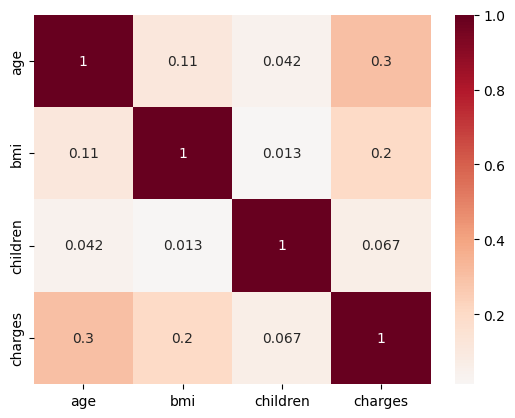

In [ ]:
# Matrice de corrélation entre les différentes variables quantitatives
sns.heatmap(df[['age','bmi','children','charges']].corr(),center=0,cmap='RdBu_r',annot=True)

# Peu de variables fortement corrélées

### Preprocessing

In [30]:
# Encodage des variables sex, smoker et region
df_model =df.join(pd.get_dummies(df[['sex','smoker','region']]))
df_model = df_model.drop(['sex','smoker','region','sex_female','smoker_no','region_northeast'],axis=1)
display (df_model)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [31]:
# Séparation features / target
X = df_model.drop('charges',axis=1)
y = df_model['charges']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

display(X_train)

array([[-1.1576804 , -0.99692768, -0.90790804, ..., -0.57266946,
        -0.60581158, -0.57410974],
       [-1.30061876, -0.79276204,  0.7669042 , ..., -0.57266946,
        -0.60581158, -0.57410974],
       [ 0.91492586,  1.15466402,  0.7669042 , ...,  1.74620801,
        -0.60581158, -0.57410974],
       ...,
       [-1.37208794, -1.4118716 , -0.07050192, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.08564268, -0.41997378,  1.60431032, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.30005022,  0.87941237,  0.7669042 , ..., -0.57266946,
         1.65067825, -0.57410974]], shape=(1069, 8))

### Entraînement du modèle ElasticNet

Best alpha : 0.02
Ordonnée à l'origine : 13030.203369289053


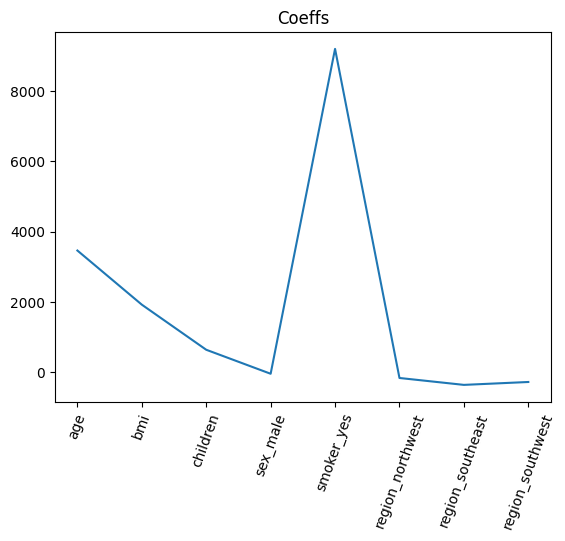

In [32]:
from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV(l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),
                       alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
                       cv=8)
encv.fit(X_train, y_train)

print ("Best alpha :",encv.alpha_)
print ("Ordonnée à l'origine :",encv.intercept_)
plt.plot(X.columns,encv.coef_)
plt.xticks(X.columns.values, X.columns.values, rotation=70)
plt.title("Coeffs")
plt.show()

### Evaluation du modèle

##### R² et RMSE

In [ ]:
# Prédiction sur l'échantillon de test
y_pred = encv.predict(X_test)

# Calcul du R² sur l'échantillon d'entrainement et de test
print("R² train:",encv.score(X_train, y_train))
print("R² test:",encv.score(X_test, y_test))

# Calcul de l'erreur quadratique moyenne sur l'échantillon d'entrainement et de test
import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE train:",np.sqrt(mean_squared_error(y_train, encv.predict(X_train))))
print("RMSE test:",np.sqrt(mean_squared_error(y_test, y_pred)))

# Le R² est de 0.80 sur l'échantillon de test, ce qui est bien
# Le RMSE de l'échantillon de test est du même ordre que celui de l'échantillon d'entraînement, il n'y a pas de suraprentissage

R² train: 0.7298934544522537
R² test: 0.8061208180533207
RMSE train: 6081.245643854393
RMSE test: 5968.791785112792


##### Visu Prédiction vs réalité

,points_observés,points_predits
900,8689.0,8161.0
1064,5709.0,5768.0
1256,11437.0,14359.0
298,38746.0,31669.0
237,4463.0,8992.0
481,9305.0,13162.0
240,38512.0,30366.0
277,2150.0,1496.0
415,7346.0,10648.0
707,10264.0,11329.0


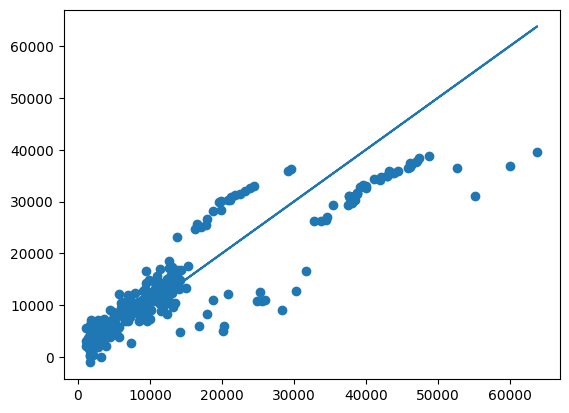

In [37]:
# Valeurs prédites % valeurs réelles
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

pd.DataFrame({'points_observés': np.round(y_test), 'points_predits' : np.round(y_pred)}).head(10)

# Conclusion : la prédiction semble relativement proche des valeurs réelles sur l'échantillon de test

##### Analyse des résidus

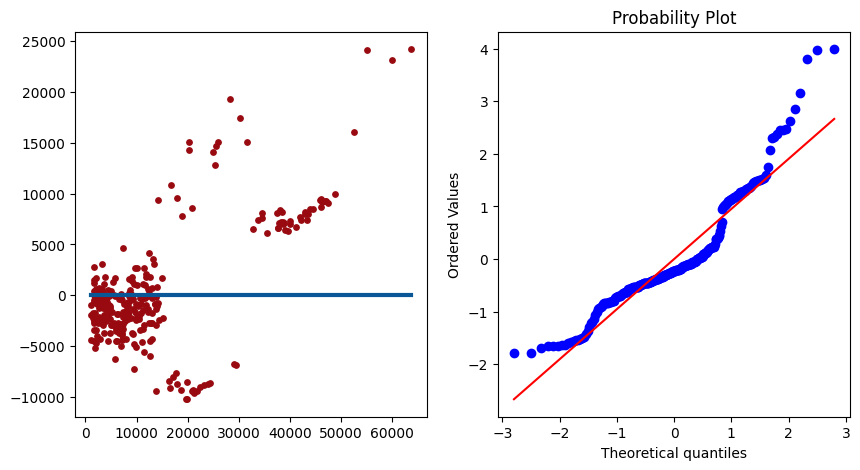

In [ ]:
# Calcul des résidus sur l'échantillon de test
residus = y_test - y_pred

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(ax[0])
# Afficher la distribution des résidus
plt.scatter(y_test, residus, color='#980a10', s=15)
plt.plot((y_test.min(), y_test.max()), (0, 0), lw=3, color='#0a5798')

# Normaliser les résidus
import scipy.stats as stats
residus_norm = (residus-residus.mean())/residus.std()

plt.sca(ax[1])
# Afficher le QQ-plot des résidus normalisés
stats.probplot(residus_norm, plot=plt)
plt.show()

# Sur l'échantillon de test, les erreurs sont globalement centrées, de variance constante, indépendantes et gaussiennes
# Les résidus deviennent plus importants pour les valeurs de charges plus élevées